In [1]:
# sanity check after restart the kernel

print("abc")

abc


In [ ]:
# create the .kaggle directory and an empty kaggle.json file
# only need for running the first time

# !mkdir -p .kaggle
# !touch .kaggle/kaggle.json
# !chmod 600 .kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
#no need if credential is already in .kaggle/kaggle.json

# import json
# kaggle_username = "kanericaws"
# kaggle_key = "<kaggle_key>"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
#only need for the first run
#!kaggle competitions download -c bike-sharing-demand


In [ ]:
# If you already downloaded it you can use the -o command to overwrite the file
#only need for the first run

#!unzip -o bike-sharing-demand.zip

In [2]:
# load the dataset 
import pandas as pd
from autogluon.tabular import TabularPredictor

train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")


In [ ]:
test.head()

In [ ]:
train.head()


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

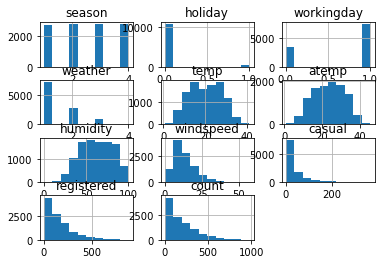

In [3]:
train.hist()

In [4]:
#create additional features

#convert str to datetime object
#format='%Y%m%d-%H%M%S'
#20210328-200000
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

train['dt_obj'] =pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['dt_obj'] =pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

# create new features
#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
train['year'] = train['dt_obj'].dt.year
train['month'] = train['dt_obj'].dt.month
train['day'] = train['dt_obj'].dt.day
train['hour'] = train['dt_obj'].dt.hour
train['min'] = train['dt_obj'].dt.minute
train['second'] = train['dt_obj'].dt.second
train['dayofweek'] = train["dt_obj"].dt.dayofweek

test['year'] = test['dt_obj'].dt.year
test['month'] = test['dt_obj'].dt.month
test['day'] = test['dt_obj'].dt.day
test['hour'] = test['dt_obj'].dt.hour
test['min'] = test['dt_obj'].dt.minute
test['second'] = test['dt_obj'].dt.second
test['dayofweek'] = test["dt_obj"].dt.dayofweek

train['season']=0

#winter
train.loc[train['month'] == 1 , 'season'] = 1
train.loc[train['month'] == 2 , 'season'] = 1
train.loc[train['month'] == 12 , 'season'] = 1
#spring
train.loc[train['month'] == 3 , 'season'] = 2
train.loc[train['month'] == 4 , 'season'] = 2
train.loc[train['month'] == 5 , 'season'] = 2
#summer
train.loc[train['month'] == 6 , 'season'] = 3
train.loc[train['month'] == 7 , 'season'] = 3
train.loc[train['month'] == 8 , 'season'] = 3

#winter
train.loc[train['month'] == 9, 'season'] = 4
train.loc[train['month'] == 10 , 'season'] = 4
train.loc[train['month'] == 11 , 'season'] = 4

test['season']=0
#winter
test.loc[test['month'] == 1 , 'season'] = 1
test.loc[test['month'] == 2 , 'season'] = 1
test.loc[test['month'] == 12 , 'season'] = 1
#spring
test.loc[test['month'] == 3 , 'season'] = 2
test.loc[test['month'] == 4 , 'season'] = 2
test.loc[test['month'] == 5 , 'season'] = 2
#summer
test.loc[test['month'] == 6 , 'season'] = 3
test.loc[test['month'] == 7 , 'season'] = 3
test.loc[test['month'] == 8 , 'season'] = 3

#winter
test.loc[test['month'] == 9, 'season'] = 4
test.loc[test['month'] == 10 , 'season'] = 4
test.loc[test['month'] == 11 , 'season'] = 4

#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
train['hr_label']=0
#7-9
train.loc[train['hour'] == 7 , 'hr_label'] = 1
train.loc[train['hour'] == 8 , 'hr_label'] = 1
train.loc[train['hour'] == 9 , 'hr_label'] = 1
#11-13
train.loc[train['hour'] == 11 , 'hr_label'] = 2
train.loc[train['hour'] == 12, 'hr_label'] = 2
train.loc[train['hour'] == 13 , 'hr_label'] = 2
#17-18
train.loc[train['hour'] == 17 , 'hr_label'] = 3
train.loc[train['hour'] == 18 , 'hr_label'] = 3



#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
test['hr_label']=0
#7-9
test.loc[test['hour'] == 7 , 'hr_label'] = 1
test.loc[test['hour'] == 8 , 'hr_label'] = 1
test.loc[test['hour'] == 9 , 'hr_label'] = 1
#11-13
test.loc[test['hour'] == 11 , 'hr_label'] = 2
test.loc[test['hour'] == 12, 'hr_label'] = 2
test.loc[test['hour'] == 13 , 'hr_label'] = 2
#17-18
test.loc[test['hour'] == 17 , 'hr_label'] = 3
test.loc[test['hour'] == 18 , 'hr_label'] = 3

test['temp_label']=0
#cold
test.loc[test['temp'] <15  , 'temp_label'] = 1
#mild
test.loc[((test['temp'] >= 15) &( test['temp'] <= 26)), 'temp_label'] = 2
#hot
test.loc[test['temp'] > 26 , 'temp_label'] = 3

train['temp_label']=0
#cold
train.loc[train['temp'] <15  , 'temp_label'] = 1
#mild
train.loc[((train['temp'] >= 15) &( train['temp'] <= 26)), 'temp_label'] = 2
#hot
train.loc[train['temp'] > 26 , 'temp_label'] = 3


train['hum_label']=0
#not-hum
train.loc[train['humidity'] <55  , 'hum_label'] = 1
#hum
train.loc[(train['humidity'] >= 55), 'hum_label'] = 2


test['hum_label']=0
#not-hum
test.loc[test['humidity'] <55  , 'hum_label'] = 1
#hum
test.loc[(test['humidity'] >= 55), 'hum_label'] = 2

test['windspeed']=0
#not-windy
test.loc[test['windspeed'] <20  , 'windspeed_label'] = 1
#windy
test.loc[(test['windspeed'] >= 20), 'windspeed_label'] = 2

train['windspeed_label']=0
#not-windy
train.loc[train['windspeed'] <20  , 'windspeed_label'] = 1
#windy
train.loc[(train['windspeed'] >= 20), 'windspeed_label'] = 2





In [5]:
#sanity check
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,windspeed_label
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.505328,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,...,6.521495,9.992559,11.541613,0.0,0.0,3.013963,0.627871,1.972625,1.621808,1.137332
std,1.116839,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,...,3.444373,5.476608,6.915838,0.0,0.0,2.004585,0.993757,0.771557,0.484958,0.344214
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,...,4.000000,5.000000,6.000000,0.0,0.0,1.000000,0.000000,1.000000,1.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,...,7.000000,10.000000,12.000000,0.0,0.0,3.000000,0.000000,2.000000,2.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,...,10.000000,15.000000,18.000000,0.0,0.0,5.000000,1.000000,3.000000,2.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,...,12.000000,19.000000,23.000000,0.0,0.0,6.000000,3.000000,3.000000,2.000000,2.000000


In [6]:
# Change weather column to a category 

train.loc[:, "hr_label"] = train["hr_label"].astype("category")
train.loc[:, "temp_label"] = train["temp_label"].astype("category")
train.loc[:, "hum_label"] = train["hum_label"].astype("category")
train.loc[:, "windspeed_label"] = train["windspeed_label"].astype("category")

test.loc[:, "hr_label"] = test["hr_label"].astype("category")
test.loc[:, "temp_label"] = test["temp_label"].astype("category")
test.loc[:, "hum_label"] = test["hum_label"].astype("category")
test.loc[:, "windspeed_label"] = test["windspeed_label"].astype("category")


In [ ]:
train.hist()

In [ ]:
#sanity check
train.info()

In [ ]:
test.info()

In [7]:
#train registered and casual riders seperately
train_c=train
train_c = train_c.drop('registered',axis=1)
train_c = train_c.drop('count',axis=1)

train_r=train
train_r = train_r.drop('casual',axis=1)
train_r = train_r.drop('count',axis=1)


In [8]:
train_r = train_r.drop('datetime',axis=1)
#train_r = train_r.drop('dt_obj',axis=1)

train_c = train_c.drop('datetime',axis=1)
#train_c = train_c.drop('dt_obj',axis=1)

test = test.drop('datetime',axis=1)
#test = test.drop('dt_obj',axis=1)



In [9]:
#sanity check
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           10886 non-null  int64         
 1   holiday          10886 non-null  int64         
 2   workingday       10886 non-null  int64         
 3   weather          10886 non-null  int64         
 4   temp             10886 non-null  float64       
 5   atemp            10886 non-null  float64       
 6   humidity         10886 non-null  int64         
 7   windspeed        10886 non-null  float64       
 8   casual           10886 non-null  int64         
 9   dt_obj           10886 non-null  datetime64[ns]
 10  year             10886 non-null  int64         
 11  month            10886 non-null  int64         
 12  day              10886 non-null  int64         
 13  hour             10886 non-null  int64         
 14  min              10886 non-null  int64

In [10]:
#sanity check
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           10886 non-null  int64         
 1   holiday          10886 non-null  int64         
 2   workingday       10886 non-null  int64         
 3   weather          10886 non-null  int64         
 4   temp             10886 non-null  float64       
 5   atemp            10886 non-null  float64       
 6   humidity         10886 non-null  int64         
 7   windspeed        10886 non-null  float64       
 8   registered       10886 non-null  int64         
 9   dt_obj           10886 non-null  datetime64[ns]
 10  year             10886 non-null  int64         
 11  month            10886 non-null  int64         
 12  day              10886 non-null  int64         
 13  hour             10886 non-null  int64         
 14  min              10886 non-null  int64

In [11]:
#sanity check
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           6493 non-null   int64         
 1   holiday          6493 non-null   int64         
 2   workingday       6493 non-null   int64         
 3   weather          6493 non-null   int64         
 4   temp             6493 non-null   float64       
 5   atemp            6493 non-null   float64       
 6   humidity         6493 non-null   int64         
 7   windspeed        6493 non-null   int64         
 8   dt_obj           6493 non-null   datetime64[ns]
 9   year             6493 non-null   int64         
 10  month            6493 non-null   int64         
 11  day              6493 non-null   int64         
 12  hour             6493 non-null   int64         
 13  min              6493 non-null   int64         
 14  second           6493 non-null   int64  

In [12]:
#https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html
predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=300, num_bag_folds=10, num_bag_sets=1, num_stack_levels=3
)
# predictor_r = TabularPredictor(label='registered', eval_metric='r2').fit(train_r,
#     num_bag_folds=10, num_bag_sets=1, num_stack_levels=3
#     #hyperparameters = {'NN_TORCH': {'num_epochs': 20}, 'GBM': {'num_boost_round': 200}}  # last  argument is just for quick demo here, omit it in real applications
# )

No path specified. Models will be saved in: "AutogluonModels/ag-20220901_101033\"
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20220901_101033\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 20
Label Column: registered
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4579.51 MB
	Train Data (Original)  Memory Usage: 1.44 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting

In [15]:
train_r.nunique()

season                 4
holiday                2
workingday             2
weather                4
temp                  49
atemp                 60
humidity              89
windspeed             28
registered           731
dt_obj             10886
year                   2
month                 12
day                   19
hour                  24
min                    1
second                 1
dayofweek              7
hr_label               4
temp_label             3
hum_label              2
windspeed_label        2
dtype: int64

In [17]:
train_c.nunique()

season                 4
holiday                2
workingday             2
weather                4
temp                  49
atemp                 60
humidity              89
windspeed             28
casual               309
dt_obj             10886
year                   2
month                 12
day                   19
hour                  24
min                    1
second                 1
dayofweek              7
hr_label               4
temp_label             3
hum_label              2
windspeed_label        2
dtype: int64

In [16]:
train_r.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,year,month,day,hour,min,second,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.505328,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,155.552177,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116839,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,151.039033,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,36.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,118.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,222.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,886.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


In [18]:
#https://auto.gluon.ai/dev/tutorials/tabular_prediction/tabular-indepth.html
predictor_c = TabularPredictor(label='casual',problem_type="regression", eval_metric='r2').fit(train_c,
    num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300
    #hyperparameters = {'NN_TORCH': {'num_epochs': 20}, 'GBM': {'num_boost_round': 200}},  # last  argument is just for quick demo here, omit it in real applications
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220901_101959\"
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20220901_101959\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 20
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3989.67 MB
	Train Data (Original)  Memory Usage: 1.44 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting Cat

	0.0s	 = Validation runtime
Fitting 9 L4 models ...
Fitting model: LightGBMXT_BAG_L4 ... Training model for up to 17.79s of the 17.78s of remaining time.
	Fitting 10 child models (S1F1 - S1F10) | Fitting with ParallelLocalFoldFittingStrategy
	0.9354	 = Validation score   (r2)
	12.2s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: WeightedEnsemble_L5 ... Training model for up to 299.86s of the -2.77s of remaining time.
	0.9354	 = Validation score   (r2)
	0.0s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 302.8s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220901_101959\")


In [ ]:
predictor_c = TabularPredictor(label="casual",problem_type="regression",eval_metric="r2").fit(
    train_data=train_c, time_limit=180, presets="best_quality"
)

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.947647       9.701470   58.875319                0.001001           0.306828            2       True          7
1          LightGBM_BAG_L1   0.946217       1.464786   17.442017                1.464786          17.442017            1       True          4
2      WeightedEnsemble_L3   0.945591      12.097251  144.412725                0.000000           0.200232            3       True         12
3          CatBoost_BAG_L2   0.945143      10.839791  108.794204                0.246968          29.324835            2       True         11
4          LightGBM_BAG_L2   0.943182      10.731441   91.169140                0.138618          11.699771            2       True          9
5   RandomForestMSE_BAG_L2   0.942750      11.151290   88.204360                

<AxesSubplot:xlabel='model'>

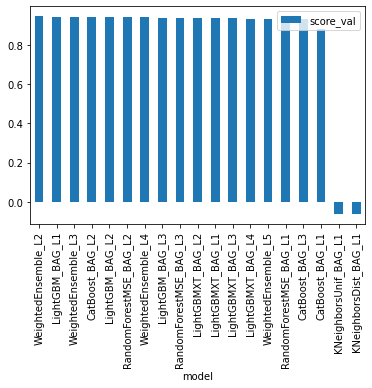

In [19]:
predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [20]:
y_pred_c = predictor_c.predict(test)

In [ ]:
predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=180, presets="best_quality"
)


*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.967967      16.510802   71.788391                0.000000           0.222437            2       True          5
1      WeightedEnsemble_L3   0.967922      18.093364  126.930918                0.000995           0.212457            3       True         10
2          CatBoost_BAG_L2   0.967773      17.406222  105.250929                0.171487          33.244304            2       True          9
3          LightGBM_BAG_L2   0.966988      17.374559   84.588304                0.139824          12.581679            2       True          7
4          LightGBM_BAG_L1   0.966472       3.719708   25.258147                3.719708          25.258147            1       True          4
5      WeightedEnsemble_L4   0.965719      19.630949  189.977676                

<AxesSubplot:xlabel='model'>

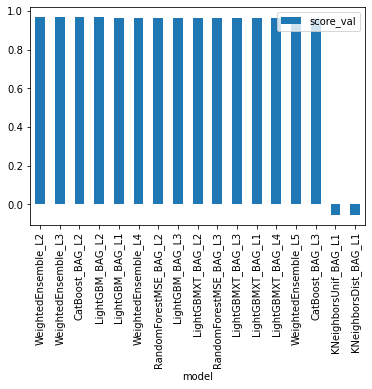

In [13]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [14]:

y_pred_r = predictor_r.predict(test)


In [30]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

,count,datetime
51,-1,2011-01-22 03:00:00
52,-4,2011-01-22 04:00:00
53,-6,2011-01-22 06:00:00
54,-5,2011-01-22 07:00:00
75,-3,2011-01-23 05:00:00
...,...,...
6091,-1,2012-11-26 03:00:00
6115,-9,2012-11-27 03:00:00
6116,-12,2012-11-27 04:00:00
6305,-1,2012-12-24 02:00:00


In [25]:
testx=pd.concat([test,y_pred_r, y_pred_c], axis=1, join='inner')

In [29]:
train.loc[train['temp'] > 26 , 'temp_label'] = 3

testx.loc[(testx['registered']<0)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_obj,year,...,hour,min,second,dayofweek,hr_label,temp_label,hum_label,windspeed_label,registered,casual
3,1,0,1,1,10.66,12.880,56,0,2011-01-20 03:00:00,2011,...,3,0,0,3,0,1,2,1.0,-0.532752,0.277671
4,1,0,1,1,10.66,12.880,56,0,2011-01-20 04:00:00,2011,...,4,0,0,3,0,1,2,1.0,-0.635517,0.250316
52,1,0,0,2,0.82,0.760,48,0,2011-01-22 04:00:00,2011,...,4,0,0,5,0,1,1,1.0,-1.963570,-2.105328
53,1,0,0,2,0.82,1.515,44,0,2011-01-22 06:00:00,2011,...,6,0,0,5,0,1,1,1.0,-4.704809,-1.793586
54,1,0,0,1,0.82,0.760,44,0,2011-01-22 07:00:00,2011,...,7,0,0,5,1,1,1,1.0,-3.492177,-2.140954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,4,0,1,3,13.12,16.665,70,0,2012-11-27 03:00:00,2012,...,3,0,0,1,0,1,2,1.0,-8.010191,-1.162269
6116,4,0,1,3,12.30,14.395,81,0,2012-11-27 04:00:00,2012,...,4,0,0,1,0,1,2,1.0,-11.794289,-0.297655
6305,1,0,1,1,8.20,12.880,75,0,2012-12-24 02:00:00,2012,...,2,0,0,0,0,1,2,1.0,-0.655338,-0.040490
6306,1,0,1,1,8.20,12.880,75,0,2012-12-24 03:00:00,2012,...,3,0,0,0,0,1,2,1.0,-1.026106,-0.448200


In [24]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,min,second,dayofweek
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.0,6493.000000,6493.000000,6493.000000,6493.000000,6493.0,6493.0,6493.000000
mean,2.508086,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,0.0,2011.503619,6.565070,25.224550,11.555367,0.0,0.0,3.007239
std,1.104716,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,0.0,0.500025,3.429462,3.339411,6.912526,0.0,0.0,1.997714
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.0,2011.000000,1.000000,20.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,0.0,2011.000000,4.000000,22.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,0.0,2012.000000,7.000000,25.000000,12.000000,0.0,0.0,3.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,0.0,2012.000000,10.000000,28.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,0.0,2012.000000,12.000000,31.000000,23.000000,0.0,0.0,6.000000


In [31]:
result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "feature enginnering.num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300. Casual Regression"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/155k [00:00<?, ?B/s]
  5%|5         | 8.00k/155k [00:00<00:02, 52.5kB/s]
 82%|########2 | 128k/155k [00:00<00:00, 610kB/s]  
100%|##########| 155k/155k [00:01<00:00, 148kB/s]


In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
import autogluon.core as ag
from sklearn.model_selection import train_test_split
# df_train_c, df_test_c = train_test_split(train_c, test_size=0.2, random_state=0)
# df_train_r, df_test_r = train_test_split(train_r, test_size=0.2, random_state=0)

# nn_options = {  # specifies non-default hyperparameter values for neural network models
#     'num_epochs': 10,  # number of training epochs (controls training time of NN models)
#     'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
#     'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
#     'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
# }



# hyperparameters = {  # hyperparameters of each model type
#                    'GBM': gbm_options,
#                    'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
#                   }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# time_limit = 5*60  # train various models for ~2 min
# num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
# search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

# hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
#     'num_trials': num_trials,
#     'scheduler' : 'local',
#     'searcher': search_strategy,
# }

#do it as regression and see if there is an improvement --improve
#'num_boost_round': 400 


# predictor_c = TabularPredictor(label='casual', problem_type="regression").fit(
#     df_train_c, tuning_data=df_test_c, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


#conclusion for casual only change is to set it to regression
# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

predictor_r = TabularPredictor(label='registered').fit(
    df_train_r, tuning_data=df_test_r, time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)




In [ ]:
predictor_c = TabularPredictor(label="casual",problem_type="regression",eval_metric="r2").fit(
    train_data=train_c, time_limit=300, presets="best_quality"
)

In [ ]:
predictor_c.fit_summary()

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:

predictor_r = TabularPredictor(label="registered",problem_type="regression",eval_metric="r2").fit(
    train_data=train_r, time_limit=300, presets="best_quality"
)

In [ ]:
predictor_r.fit_summary()

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")


In [ ]:
y_pred_c = predictor_c.predict(test)

In [ ]:
y_pred_r = predictor_r.predict(test)

In [ ]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)


# predictor_c_p = TabularPredictor(label="casual").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

In [ ]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_r.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [ ]:
# # # predict from specific model/stack
# # #i = 0  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_c_p.get_model_names()[i]
# #y_pred_r = predictor_r.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
#     #LightGBM\T2

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 1  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_c_p.get_model_names()[i]
# y_pred_c = predictor_c_p.predict(test, model=model_to_use)
# print(i);print(model_to_use);
# #LightGBM\T2


In [ ]:
# i = 10  # index of model to use

# for i in range(0, 11):
#     model_to_use = predictor_r.get_model_names()[i]
#     print(i);print(model_to_use);
# #y_pred_r = predictor_r.predict(test, model=model_to_use)


In [ ]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)

# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


In [ ]:
# predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
# predictor_c = TabularPredictor(label="casual").fit(
#     train_data=train_c, time_limit=180, presets="best_quality"
# )

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# #i = 1  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_r.get_model_names()[i]
# #y_pred_c = predictor_c_p.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
# #LightGBM\T2

In [ ]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 6  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_r.get_model_names()[i]
# print(i);print(model_to_use);

# y_pred_r = predictor_r.predict(test, model=model_to_use)
# #LightGBM\T2

In [ ]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [ ]:
test.info()

In [ ]:
y_pred_r


In [ ]:
y_pred_r[y_pred_r<0]

In [ ]:
y_pred_c[y_pred_c<0]

In [ ]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

In [ ]:
train_c.info()

In [ ]:






result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "drop datetime string. feature enginnering. use regression instead of classification in casual, num_bag_folds=10, num_bag_sets=1, num_stack_levels=3,time_limit=300, R2 metric"